# Problem Statement

The main aim of this project is to detect age and gender through the given data set. We will be using simple python and Keras methods for detecting age and gender. 

# Work Flow

1. Data Collection -> Loading the dataset. Dataset comprises age, gender, images, and pixels.
2. Data Processing -> convert all the columns into an array by using the numpy array
3. Data Splitting -> Creating training data and test data
4. Defining the architecture of the model -> building a neural network using Keras
5. Training the model
6. Evaluating model performance -> on both training and test set
7. Making a predective System -> To test whether our model predicts exactly or not

In [1]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

# Data Collection

In [2]:
# loading the dataset
data = pd.read_csv('/content/drive/MyDrive/age_gender.csv')
data.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


In [3]:
# converting to dataframe
data_df = pd.DataFrame(data)

# Data Processing

**Converting all the columns into an array by using the np.array and into dtype float**

We will convert the column-named pixels into an array by using the NumPy library and Reshaping them into dimensions (48, 48) by using the lambda function. We also converted the values in the float by the same lambda function.

In [4]:
# Converting pixels into numpy array
data_df['pixels'] = data_df['pixels'].apply(lambda x:  np.reshape(np.array(x.split(), dtype="float32"), (48,48)))
data_df.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,"[[129.0, 128.0, 128.0, 126.0, 127.0, 130.0, 13..."
1,1,2,0,20161219222752047.jpg.chip.jpg,"[[164.0, 74.0, 111.0, 168.0, 169.0, 171.0, 175..."
2,1,2,0,20161219222832191.jpg.chip.jpg,"[[67.0, 70.0, 71.0, 70.0, 69.0, 67.0, 70.0, 79..."
3,1,2,0,20161220144911423.jpg.chip.jpg,"[[193.0, 197.0, 198.0, 200.0, 199.0, 200.0, 20..."
4,1,2,0,20161220144914327.jpg.chip.jpg,"[[202.0, 205.0, 209.0, 210.0, 209.0, 209.0, 21..."


We divided the values further by 255.

(-0.5, 47.5, 47.5, -0.5)

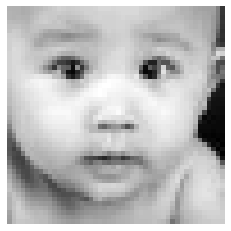

In [5]:
# visualizing the sample image
data_df['pixels']= data_df['pixels']/255
im = data_df['pixels'][0]
#im
plt.imshow(im, cmap='gray')
plt.axis('off')

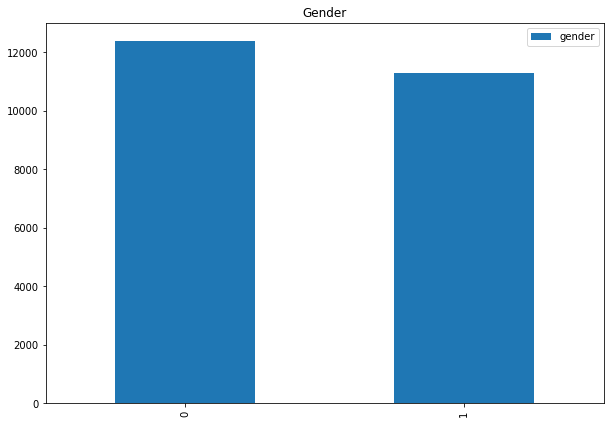

In [6]:
# Visualizing Gender 

plt.xlabel = 'Gender (1= Female, 0-Male)'
plt.figure(figsize=(10,7))
ax=data_df.gender.value_counts().plot.bar(x='Gender (1= Female, 0-Male)', y='Count', title='Gender', legend = (1,0, ('Female', 'Male')))

Text(0.5, 1.0, 'Ethinicity')

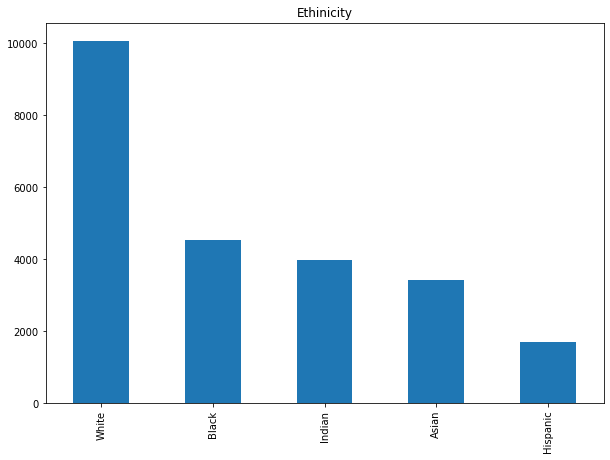

In [7]:
# Visualizing Ethinicity 

plt.figure(figsize=(10,7))
labels =['White','Black','Indian','Asian','Hispanic']
ax=data_df.ethnicity.value_counts().plot.bar()
ax.set_xticklabels(labels)
ax.set_title('Ethinicity')

To convert all the values into float and reshape it, we used function for and NumPy. To have the age and gender stored in the list, we will use the other variable labels_f. A later model will be used to fit the data and validate it.

In [8]:
x = np.zeros(shape=(23705,48,48))
for i in range(len(data_df["pixels"])):
    x[i] = data_df["pixels"][i]

In [9]:
# Converting age into numpy array

age = data_df['age']
age = age.astype(float)
age = np.array(age)
age.shape

(23705,)

In [10]:
# Converting gender into numpy array

gen = data_df['gender']
gen = np.array(gen)
gen.shape

(23705,)

In [11]:
# Both age and gender are combined and stored in labels_f, we will further convert the list into array.

labels_f =[]
i=0

while i <len(age):
    label=[]
    label.append([age[i]])
    label.append([gen[i]])
    labels_f.append(label)
    i+=1

labels_f =np.array(labels_f)
labels_f.shape

(23705, 2, 1)

# Data Splitting

In [12]:
#Splitting the data taking data set

import tensorflow as tf
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(x, labels_f, test_size=0.25)

In [13]:
# Shape output of x_train, x_test, y_train, and y_test

print(x_train.shape)
print(x_test.shape)

print(y_train.shape)
print(y_test.shape)

(17778, 48, 48)
(5927, 48, 48)
(17778, 2, 1)
(5927, 2, 1)


In [14]:
y_train_2 = [y_train[:,1], y_train[:,0]]
y_test_2 = [y_test[:,1], y_test[:,0]]

# Defining the architecture of the model

In [15]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten,BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

def Convolution(input_tensor,filters):

    inp = Conv2D(filters=filters, kernel_size=(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001))(input_tensor)
    inp = Dropout(0.1)(inp)
    inp = Activation('relu')(inp)
    return inp

def model(input_shape):

    inputs = Input((input_shape))

    conv_1= Convolution(inputs,32)
    maxp_1 = MaxPooling2D(pool_size = (2,2)) (conv_1)

    conv_2 = Convolution(maxp_1,64)
    maxp_2 = MaxPooling2D(pool_size = (2, 2)) (conv_2)

    conv_3 = Convolution(maxp_2,128)
    maxp_3 = MaxPooling2D(pool_size = (2, 2)) (conv_3)

    conv_4 = Convolution(maxp_3,256)
    maxp_4 = MaxPooling2D(pool_size = (2, 2)) (conv_4)

    flatten = Flatten()(maxp_4)

    dense_1 = Dense(64,activation='relu')(flatten)
    dense_2 = Dense(64,activation='relu')(flatten)
    drop_1 = Dropout(0.2)(dense_1)
    drop_2 = Dropout(0.2)(dense_2)

    output_1 = Dense(1,activation="sigmoid",name='sex_out')(drop_1)
    output_2 = Dense(1,activation="relu",name='age_out')(drop_2)

    model = Model(inputs=[inputs], outputs=[output_1,output_2])
    model.compile(loss=["binary_crossentropy","mae"], optimizer="Adam", metrics=["accuracy"])

    return model

In [16]:
# summary of the model
Model = model((48,48,1))
Model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 48, 48, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 48, 48, 32)   320         input_1[0][0]                    
__________________________________________________________________________________________________
dropout (Dropout)               (None, 48, 48, 32)   0           conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 48, 48, 32)   0           dropout[0][0]                    
______________________________________________________________________________________________

# Training the model

In [17]:
# storing the trained model in History variable which will be used to visualize the training process
History = Model.fit(x_train, y_train_2, batch_size=64, validation_data=(x_test,y_test_2), epochs=5)

Epoch 1/5
278/278 [==============================] - 8s 16ms/step - loss: 16.7986 - sex_out_loss: 0.6956 - age_out_loss: 15.9210 - sex_out_accuracy: 0.5274 - age_out_accuracy: 0.0478 - val_loss: 15.4177 - val_sex_out_loss: 0.6816 - val_age_out_loss: 14.5660 - val_sex_out_accuracy: 0.6065 - val_age_out_accuracy: 0.0457
Epoch 2/5
278/278 [==============================] - 4s 13ms/step - loss: 13.5468 - sex_out_loss: 0.6302 - age_out_loss: 12.7146 - sex_out_accuracy: 0.6470 - age_out_accuracy: 0.0466 - val_loss: 12.5927 - val_sex_out_loss: 0.5688 - val_age_out_loss: 11.7914 - val_sex_out_accuracy: 0.7280 - val_age_out_accuracy: 0.0435
Epoch 3/5
278/278 [==============================] - 4s 13ms/step - loss: 11.4214 - sex_out_loss: 0.5625 - age_out_loss: 10.6052 - sex_out_accuracy: 0.7134 - age_out_accuracy: 0.0440 - val_loss: 14.5970 - val_sex_out_loss: 0.5371 - val_age_out_loss: 13.7897 - val_sex_out_accuracy: 0.7608 - val_age_out_accuracy: 0.0373
Epoch 4/5
278/278 [=====================

# Evaluating model performance

In [18]:
Model.evaluate(x_test,y_test_2)

186/186 [==============================] - 1s 4ms/step - loss: 10.3944 - sex_out_loss: 0.4505 - age_out_loss: 9.6237 - sex_out_accuracy: 0.7997 - age_out_accuracy: 0.0457


[10.39439582824707,
 0.45051294565200806,
 9.623739242553711,
 0.7997300624847412,
 0.04572296142578125]

In [19]:
# getting predictions for the test set
pred = Model.predict(x_test)
pred[1]

array([[43.535934],
       [28.291037],
       [48.95317 ],
       ...,
       [23.348951],
       [21.34199 ],
       [32.95664 ]], dtype=float32)

# Making a predective System

In [20]:
def test_image(ind, x, Model):

    plt.imshow(x[ind])
    image_test = x[ind]

    pred_1 = Model.predict(np.array([image_test]))

    sex_f = ['Female','Male']
    Age = int(np.round(pred_1[1][0]))
    Sex = int(np.round(pred_1[0][0]))

    print("Predicted Age: "+ str(Age))
    print("Predicted Sex: "+ sex_f[Sex])

Predicted Age: 22
Predicted Sex: Male


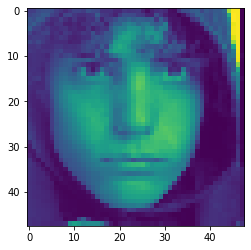

In [21]:
test_image(1980, x, Model)

Predicted Age: 25
Predicted Sex: Female


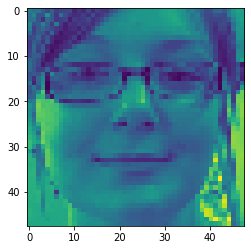

In [22]:
test_image(3398, x, Model)

Predicted Age: 32
Predicted Sex: Male


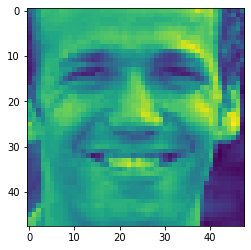

In [23]:
test_image(12589, x, Model)

Predicted Age: 14
Predicted Sex: Male


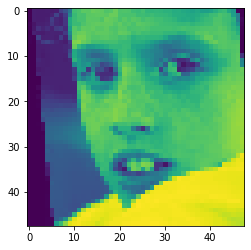

In [24]:
test_image(23456, x, Model)

Predicted Age: 21
Predicted Sex: Male


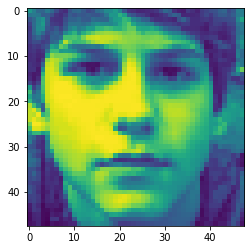

In [26]:
test_image(1851, x, Model)

# Conclusion

Python obtained images and the Model did not do well much in the accuracy rate, further, improvement is required in the model algorithm.

The task of recognizing age and gender, is an innately troublesome issue. The fundamental justification for this trouble hole lies in the information needed to prepare these kinds of frameworks.